## TapDanceDecoder: MVP (Pre-augmentation)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [2]:
tap_df = pd.read_csv('../../../Source/Data/all_data_pad_mfcc_zcr_energy_rmse_bpm.csv')


In [3]:
tap_df.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,500,501,502,503,504,505,506,507,508,BPM
0,../../../Source/Clean_train_clips/All_data_pad...,1,-316.899433,40.496876,-47.606103,20.414424,-13.223124,9.532101,-9.091608,-0.184608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.768029
1,../../../Source/Clean_train_clips/All_data_pad...,1,-382.872937,51.379340,-46.647768,19.897312,-3.929729,2.681134,-9.399345,-1.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.332031
2,../../../Source/Clean_train_clips/All_data_pad...,1,-371.174863,50.103908,-71.744771,21.426257,-7.118995,-4.108719,-12.560796,-0.070634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.999081
3,../../../Source/Clean_train_clips/All_data_pad...,1,-319.385528,83.077064,-74.035784,16.116328,-8.312489,1.627171,-18.326527,-2.684849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.999081
4,../../../Source/Clean_train_clips/All_data_pad...,0,-405.937876,35.606141,-31.218399,13.855576,-16.178129,3.175495,-8.401305,-5.367274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.499023


In [4]:
tap_df.shape

(343, 512)

## Models

### Load the data

In [5]:
X = tap_df.iloc[:,2:]
y = tap_df['Labels']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17, stratify=y)

In [7]:
X_train.shape, X_test.shape

((229, 510), (114, 510))

In [8]:
y_train.shape, y_test.shape

((229,), (114,))

## Logistic Regression

In [162]:
logreg = LogisticRegression(random_state=17)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [164]:
len(predict), len(y_test)

(114, 114)

In [165]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [166]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
215,1,0,1.000000
234,0,1,0.001525
18,0,1,0.195754
92,1,0,0.743812
297,1,0,0.878937
324,1,0,0.969439
138,1,0,0.999577
317,0,1,0.000298
15,0,1,0.000714
105,0,1,0.166134


In [167]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8157894736842105


### Visualizing results

In [168]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, drop_intermediate=True)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))
    #print(thresholds.shape)
    #print(len(np.unique(y_prob)))

In [169]:
results.shape

(114, 3)

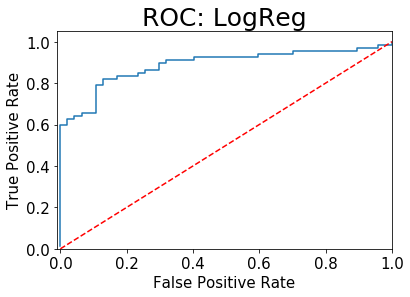

ROC_AUC_Score: 0.8882184820577961


In [170]:
ROC_plot('LogReg',  results['True'], 1-results['Prob_0_lr'])

## Can't see the forest for the trees.... Random Forest Classifier

In [156]:
rnd_clf = RandomForestClassifier(random_state=17)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [157]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [158]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [159]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
215,1,0,1.000000e+00,0,0.8
18,0,1,1.957540e-01,1,0.3
15,0,1,7.143472e-04,1,0.3
149,1,1,5.176091e-07,0,0.6
105,0,1,1.661337e-01,1,0.2
2,1,1,7.552233e-03,0,0.8
135,1,1,1.332179e-04,0,0.6
132,0,0,9.996257e-01,1,0.3
141,0,0,9.999981e-01,1,0.4
264,1,1,3.919344e-02,0,0.5


In [160]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.8508771929824561


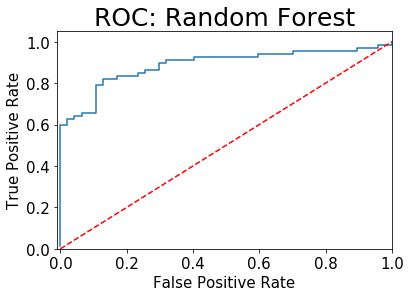

ROC_AUC_Score: 0.8882184820577961


In [161]:
ROC_plot('Random Forest',  results['True'], 1-results['Prob_0_lr'])

In [154]:
#results.to_csv('../../../Source/Data/results_sklearn_all_data_all_features.csv', index = False)

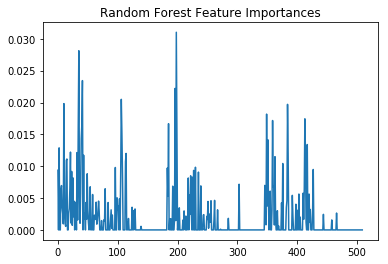

In [155]:
important = rnd_clf.feature_importances_
plt.plot(important)
plt.title('Random Forest Feature Importances');

- mfcc: 0-19
- zcr: 20-182
- energy: 183-345
- rmse: 346-508
- tempo: 509

In [32]:
important.argmax()

198

In [35]:
198-182

16

This corresponds to a window from the signal's energy (window 16), which appears to be a (relatively important) deciding factor for this nonlinear model.

## Cross validation

In [122]:
print('Logistic Regression')
print(cross_val_score(logreg, X_train, y_train, cv=5))
print((cross_val_score(logreg, X_train, y_train, cv=5)).mean())

Logistic Regression
[0.84782609 0.86956522 0.84782609 0.91304348 0.93333333]
0.8823188405797101


In [123]:
print('Random Forest')
print(cross_val_score(rnd_clf, X_train, y_train, cv=5)) 
print((cross_val_score(rnd_clf, X_train, y_train, cv=5)).mean())

Random Forest
[0.80434783 0.76086957 0.89130435 0.91304348 0.84444444]
0.8428019323671497


Based on the cross validation scores, it appears that the generalized linear model (LogReg) outperforms the nonlinear model (Random Forest), which appears to be overfitting the data. <br/> Will it perform better by reducing the max depth to avoid overfitting and increasing the number of trees in the forest?

In [109]:
rnd_clf2 = RandomForestClassifier(max_depth=8, random_state=17, n_estimators=100)
rnd_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [110]:
predict_rf2 = rnd_clf2.predict(X_test)
proba_rf2 = rnd_clf2.predict_proba(X_test)

In [111]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf2)))

Accuracy score: 0.9035087719298246


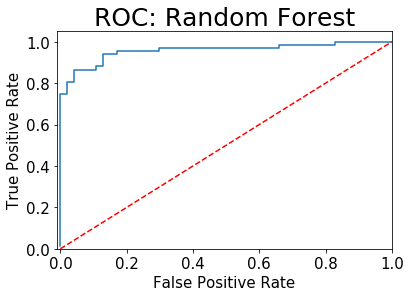

ROC_AUC_Score: 0.9577643696411559


In [118]:
ROC_plot('Random Forest', y_test, rnd_clf2.predict_proba(X_test)[:,1])

In [124]:
print('Random Forest, tuned')
print(cross_val_score(rnd_clf2, X_train, y_train, cv=5)) 
print((cross_val_score(rnd_clf2, X_train, y_train, cv=5)).mean())

Random Forest, tuned
[0.89130435 0.82608696 0.93478261 0.91304348 0.95555556]
0.9041545893719807


That seemed to help!